# Basic tests of implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import sys

sys.path.append("../src")
from stochastic_glv_generator import *
from ED_testing import *

@njit
def set_nb_seed(seed):
    np.random.seed(seed)

## Test abundace trajectories generation

new matrix 5

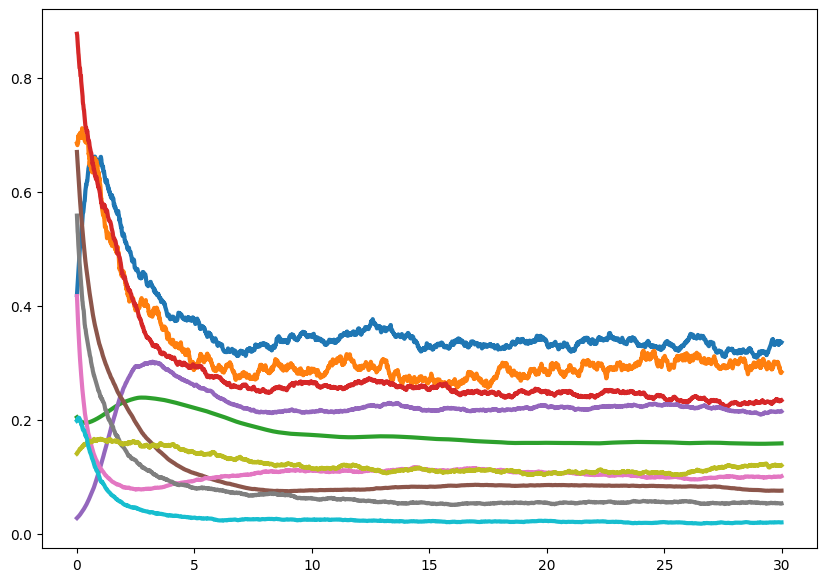

In [30]:
n = 10
seed = 1
r_max = 1.
A_diag_std = 1.
A_off_diag_std = 10.

p = sort_glv_params(n, seed, r_max, A_diag_std, A_off_diag_std)

np.random.seed(seed)
sig = np.random.uniform(0, 0.1, n)

x0 = np.random.uniform(0, 1, n)

dt = 1e-3
t_eval = np.arange(0, 30, 1e-2)
#%%

t0 = 0.
set_nb_seed(12)

sol = euler_maruyama(glv, t0, x0, p, sig, dt, t_eval)

plt.figure(figsize=(10, 7))
plt.plot(t_eval, sol, lw=3)
plt.show()

## Subsampling

In [35]:
t2 = t_eval[::100]

In [36]:
sol2 = subsampler(t2, t_eval, sol)

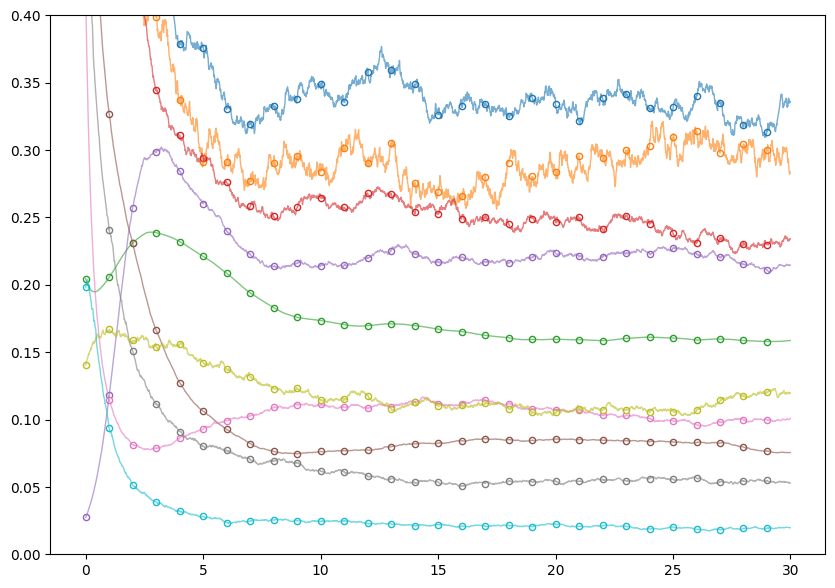

In [42]:
plt.figure(figsize=(10, 7))
plt.plot(t_eval, sol, lw=1, alpha=0.6)
for i in range(sol2.shape[1]):
    plt.scatter(t2, sol2[:,i], facecolors="w", edgecolors=f"C{i}", s=20)

plt.ylim(0, 0.4)
plt.show()